In [40]:
import numpy as np
import pandas as pd
import scipy
from scipy.linalg import qr, solve_triangular
import matplotlib.pyplot as plt

np.set_printoptions(suppress=False, precision=4)


def load_data_task1():
    dades = pd.read_csv("dades.txt", header=None, sep="   ", engine="python").values
    A = dades[:, 0]
    b = dades[:, 1]
    return A, b


def load_data_task2():
    dades_regressio = pd.read_csv("dades_regressio.csv", header=None).values
    A = dades_regressio[:, :-1]
    b = dades_regressio[:, -1]
    return A, b


def normal_equation(A, x, b):
    return A.T @ (A @ x - b)




def least_squares_full_rank(A, b, method):
    
    rank = np.linalg.matrix_rank(A)
    m = A.shape[0]
    n = A.shape[1]

    assert A.shape[0] == b.shape[0]
    assert A.shape[0] >= A.shape[1]
    assert rank == n
    assert method in ["norm_eq", "qr_fact"]

    if method == "norm_eq":
        d = A.T @ b
        G = np.linalg.cholesky(A.T @ A)
        y = np.linalg.solve(G, d)
        x_ls = np.linalg.solve(G.T, y)
        error = None

    elif method == "qr_fact":
        Q, R = np.linalg.qr(A)
        y = Q.T @ b
        y1 = y[:n]
        y2 = y[n:]
        R1 = R[:n]
        x_ls = solve_triangular(R1, y1)
#         error = np.linalg.norm(y2, 2)**2
        error = np.linalg.norm(A.dot(x_ls) - b, ord=2)
        plot_data1(A[:,1], A@x_ls, b)
        
    return error

def least_squares_not_full_rank(A, b):
    
    rank = np.linalg.matrix_rank(A)
    m = A.shape[0]
    n = A.shape[1]
#     print('n=',n, 'm:',m,'rank=',rank)
#     Q, R, P = qr(A, pivoting=True, mode='economic')
    Q, R, P = qr(A, pivoting=True)

    assert Q.shape == (m,m)
    assert R.shape == (m,n)
    assert np.allclose(A[:, P], Q @ R)
    assert A.shape[0] == b.shape[0]
    assert A.shape[0] >= A.shape[1]
    assert rank < n
    qtb = (Q.T @ b).T
    print(qtb.shape[0], n, m)
    assert qtb.shape[0] == n 
#     print('Q:', Q.shape, 'b:',b.shape, 'qtb:', qtb.shape)
    c = qtb[:rank]
    d = qtb[rank:]
    v = np.zeros((n - rank)) # we are assuming simple solution with v = 0
    print(n,rank,n-rank,d.shape[0])
    assert d.shape[0] == n - rank
    assert v.shape[0] == n - rank
    R1 = R[:rank, :rank]
#     S = R[:rank, :rank] nomatter what it is it is zeroed by v
    u = np.linalg.solve(R1, c)
    assert c.shape[0] == rank
    assert u.shape[0] == rank
    uv = np.concatenate((u, v)).T
    x_ls = uv[P.T]
    error = np.linalg.norm(b - A@x_ls, 2)**2
    expected_error = np.linalg.norm(d, 2)**2
    
#     print('c,d,v,u,R1,uv,x_ls')
#     for o in [c,d,v,u,R1,uv,x_ls]:
#         print(o.shape)
    return error, expected_error
    
def generate_poly_matrix(A, dim):
    assert isinstance(dim, int)
    assert dim > 0
    return np.vstack([A ** d for d in range(dim)]).T


def plot_data1(A, solution, b):
    A_sorted, b_sorted = zip(*sorted(zip(A, b)))
    plt.plot(A_sorted, b_sorted)
    A_sorted, solution_sorted = zip(*sorted(zip(A, solution)))
    plt.plot(A_sorted, solution_sorted)
    plt.gcf().set_size_inches(2,1)
    plt.show()


def test1():
    A, b = load_data_task1()
    print("method", "dim", "result", sep=":\t|", end=":\n")
    print("-" * 28)
    for dim in range(2,8):
        A_poly = generate_poly_matrix(A, dim)
        for m in ["norm_eq", "qr_fact"]:
            print(m, A_poly.shape[1], least_squares_full_rank(A_poly, b, method=m), sep="\t|")


def test2():
    A, b = load_data_task2()
    print('error: obtained, teoretical')
    print(least_squares_not_full_rank(A, b))

method:	|dim:	|result:
----------------------------
norm_eq	|2	|None


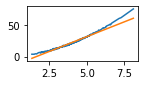

qr_fact	|2	|37.11457973111771
norm_eq	|3	|None


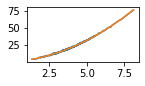

qr_fact	|3	|10.88082840185219
norm_eq	|4	|None


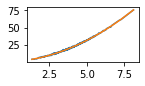

qr_fact	|4	|10.880500221616828
norm_eq	|5	|None


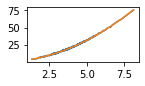

qr_fact	|5	|10.873692595264194
norm_eq	|6	|None


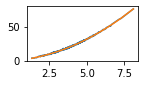

qr_fact	|6	|10.864863438271676
norm_eq	|7	|None


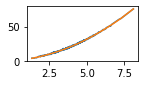

qr_fact	|7	|10.86175665750056


In [41]:
test1()

In [42]:
test2()

error: obtained, teoretical
15 11 15


AssertionError: 